# Week3　授業課題1　信用情報の分析  
＜目的＞  
- 実データに近いものの分析を行う
- データセットに対して自ら課題を設定できるようにする
  
Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。
Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行います。

### 【問題1】コンペティション内容の把握  
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。
- Home Creditはどのような企業？
- このコンペティションでは何を予測する？
- それを予測することで企業が得られるメリットは何？

＜回答＞  
1. Home Creditはどのような企業？  
信用情報がなく銀行で融資を受けられなかった層に、融資を検討する企業

2. このコンペティションでは何を予測する？  
顧客の返済能力

3. それを予測することで企業が得られるメリットは何？  
顧客がデフォルトする可能性を予想できる

### 【問題2】データの概観の把握  
データの概観を把握するために以下のようなことを行ってください。
- ``.head()``、``.info()``、``describe()``などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す

それぞれ結果に対する説明や考察も行ってください。

In [42]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

# データの概観
train = pd.read_csv('application_train.csv')
train.head()
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


- 特徴量の種類は数値データ：102、分類データ：16
- 数値データの範囲は特徴量によって大きく異なる

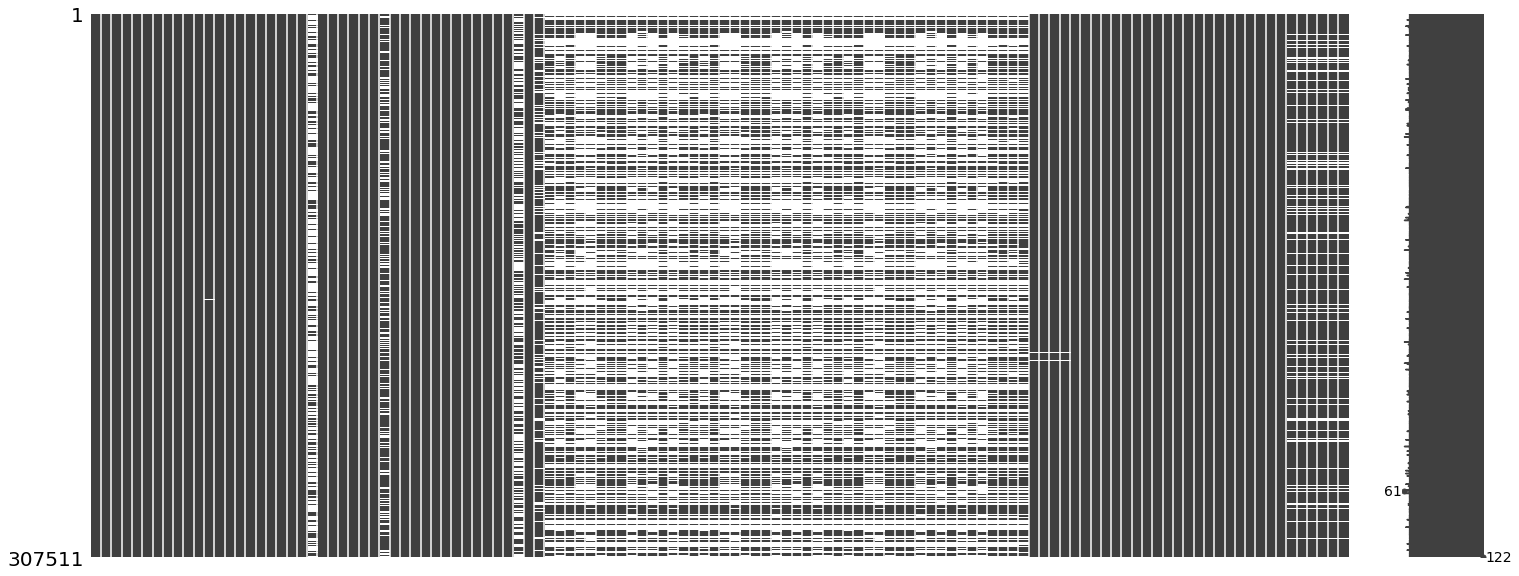

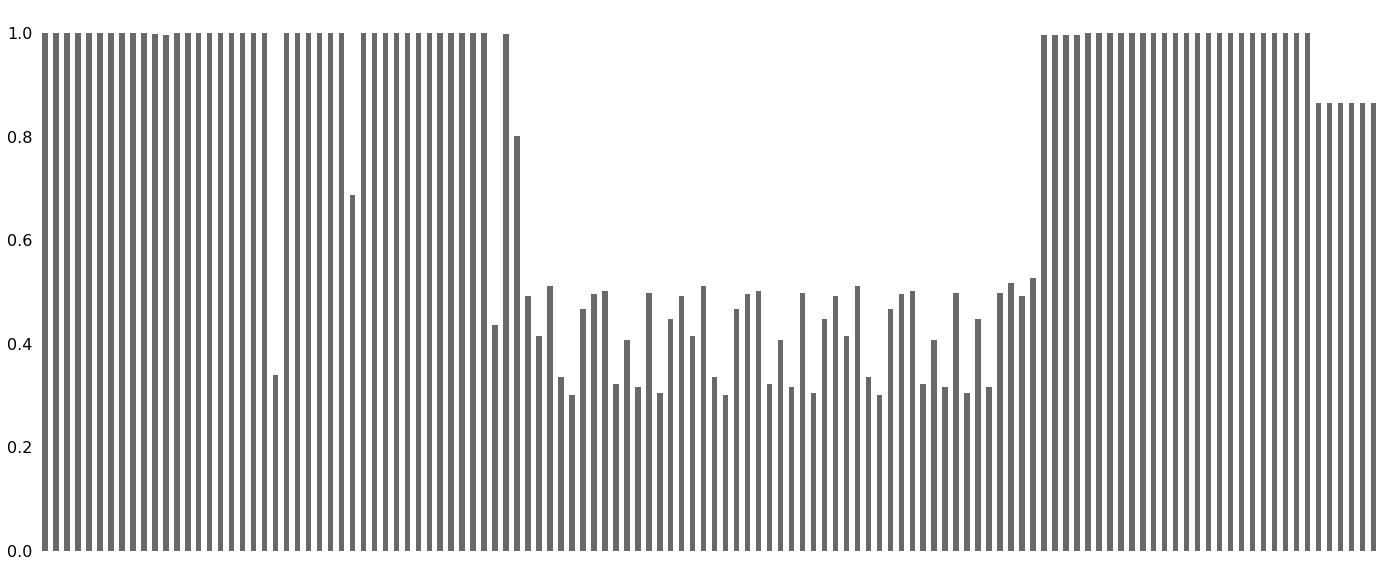

In [2]:
# 欠損値の確認
import missingno as msno
msno.matrix(train)
plt.show()
msno.bar(train)
plt.show()

- 約半分の特徴量は、欠損率が0.5を超えている

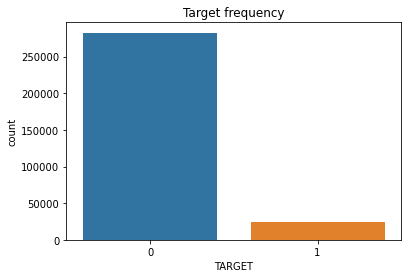

frequency :
0    282686
1     24825
Name: TARGET, dtype: int64


In [3]:
# クラスごとのデータ数を描画
plt.title('Target frequency')
sns.countplot(x='TARGET', data=train)
plt.show()

print('frequency :\n{}'.format(train['TARGET'].value_counts()))

- 9割以上が返済の遅延なし（0）

### 【問題3】課題設定  
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

＜課題・疑問＞  
- 個々の特徴量の意味が把握できていない
- 特徴量の数が多い
- 欠損率の高い特徴量も多い
- 数値変数では、値の範囲や分散が大きく異なる
- カテゴリカル変数では、名義尺度なのか順序尺度なのかが不明
- 特徴量間の相関の強さも不明
- データの数が多い

＜方針＞
1. 欠損率の低い特徴量をみる
　- カテゴリカル変数は順序尺度・名義尺度ごとに数値へ変形
  - 数値変数はそのまま
  - 両者の相関係数行列を計算し、上位をみる
2. 欠損率の高い特徴量をみる
  - 欠損のあるサンプルを削除
  - 相関係数行列の上位をみる
3. 特徴量を選択

### 【問題4】データ探索  
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを**15個以上**作成してください。
探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

In [5]:
# 特徴量が多いため、欠損率が0.8以上のものを削除
df = train.dropna(thresh=307511*0.8, axis=1)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


- 72の特徴量を選定

< deficit rate >


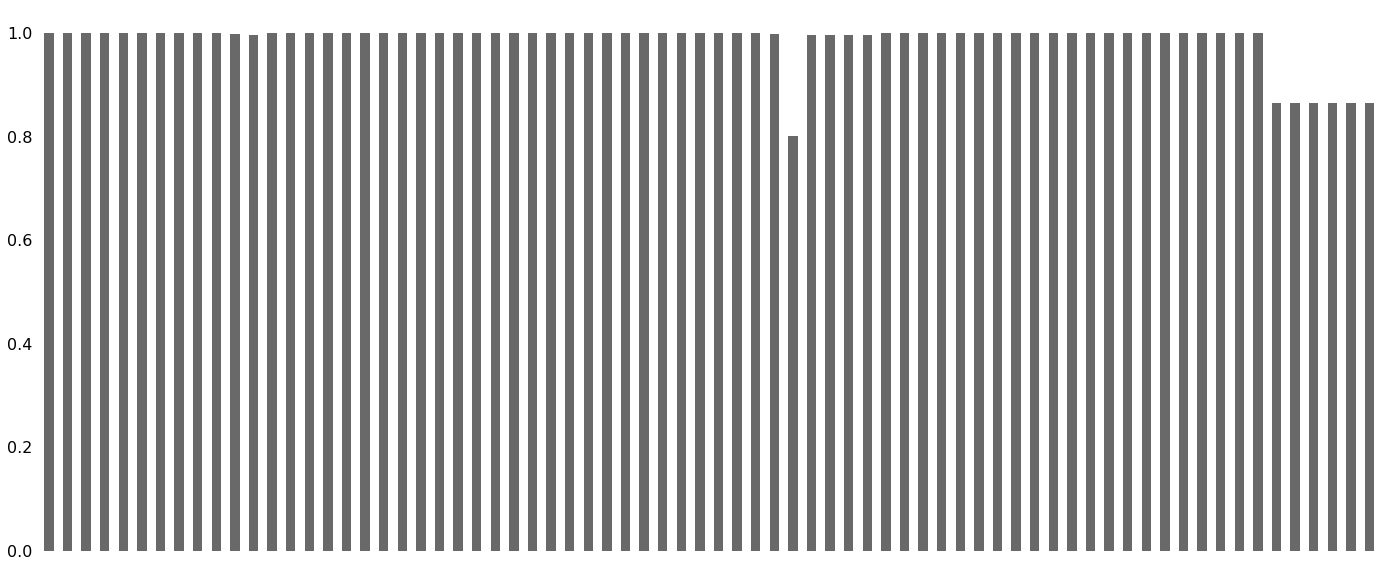

In [6]:
# 欠損率の描画
print('< deficit rate >')
msno.bar(df)
plt.show()

- 約7つの特徴量に、約0.8の欠損率あり

### 1. categorical variables

In [32]:
# カテゴリカルな特徴量を抽出
df_cat = df.select_dtypes(include=object)
df_cat = pd.concat([df['TARGET'], df_cat], axis=1)
df_cat.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

- カテゴリカル変数は12個

In [9]:
# pandas-profilingを用いてカテゴリカル変数の中身を確認
from pandas_profiling import ProfileReport
profile_category = ProfileReport(df_cat)
profile_category

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


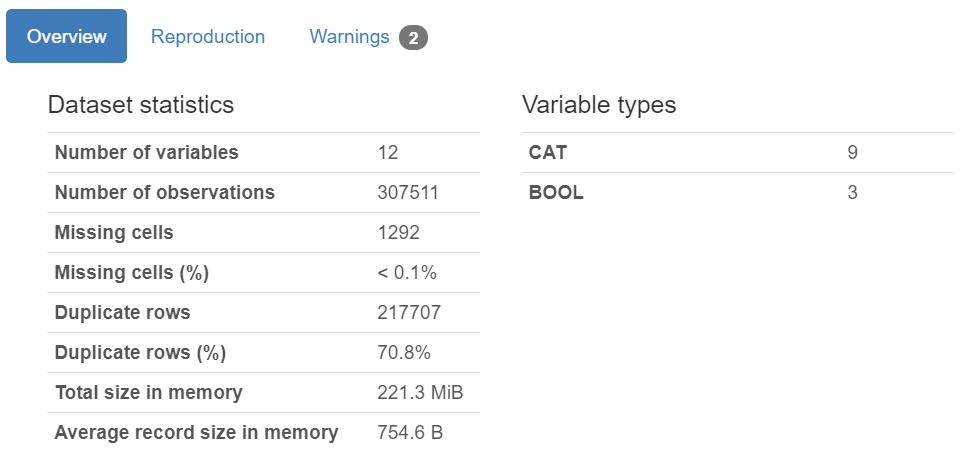

In [75]:
# カテゴリカル変数の概要
from IPython.display import Image
Image("1.png")

- 2値分類されるものが2つ（3つから'TARGET'を除いて）
- それ以外は3つ以上に分類

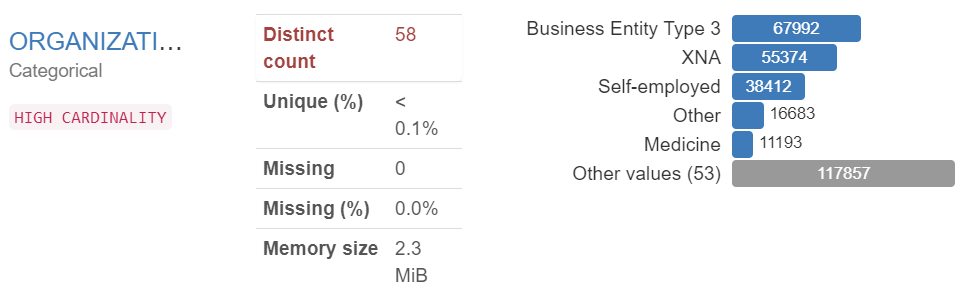

In [130]:
# 種類の多い特徴量
Image("3.png")

- 5つの分類とその他からなる  
- Other valuesの構成要素は頻度が少ないと考えられる

In [11]:
# 'ORGANIZATION_TYPE'をone hotに変換
df_temp = pd.get_dummies(df_cat['ORGANIZATION_TYPE'])
# 構成要素の頻度が少ないと思われるOther valuesを除いて再構成
df_cat2 = df_temp[['Business Entity Type 3', 
                   'XNA', 
                   'Self-employed',
                   'Other', 
                   'Medicine']]
df_cat2.head()

,Business Entity Type 3,XNA,Self-employed,Other,Medicine
0,1,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,0


- 頻度の少ないOther valuesを除いてone hot型に変換された

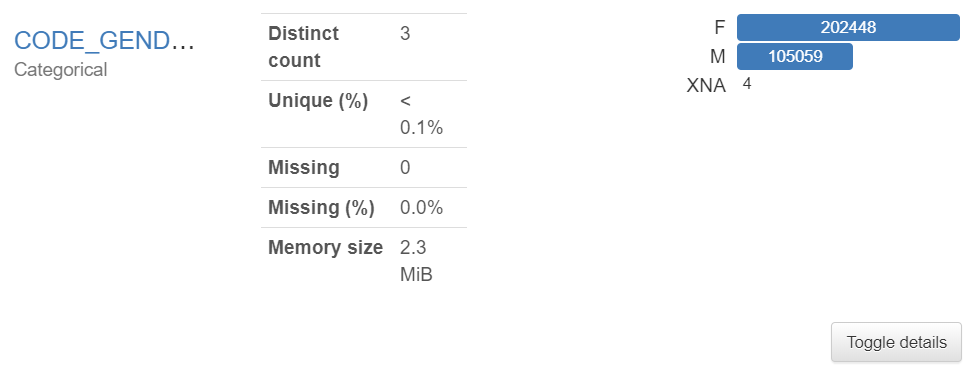

In [131]:
# 性別
Image("4.png")

- 女性が男性の倍いる
- XNAという分類もあるが、4人と非常に少ないため無視しても問題ないと思われる

In [36]:
# 性別をone hotに変換し、第三のカテゴリを男性を除く
df_temp = pd.get_dummies(df_cat['CODE_GENDER'])
df_cat3 = df_temp[['F']]
df_cat3.head()

,F
0,0
1,1
2,0
3,1
4,0


In [35]:
# もともと二値分類の特徴量はそのまま（0/1）へ変換
# 変換後に片方を落とす
df_temp = pd.get_dummies(df_cat[['FLAG_OWN_REALTY', 
                                 'FLAG_OWN_CAR', 
                                 'NAME_CONTRACT_TYPE']])
df_cat4 = df_temp.drop(['FLAG_OWN_REALTY_N', 
                        'FLAG_OWN_CAR_N', 
                        'NAME_CONTRACT_TYPE_Cash loans'], axis=1)
df_cat4.head()

,FLAG_OWN_REALTY_Y,FLAG_OWN_CAR_Y,NAME_CONTRACT_TYPE_Revolving loans
0,1,0,0
1,0,0,0
2,1,1,1
3,1,0,0
4,1,0,0


- 性別は「女性であるかどうか」(0/1)に変換
- 不動産・車の所有の有無は（0/1）へ変換
- Cash/Revolvingの契約種別も（0/1）へ変換

- 二値分類では (0/1) の一列で状態が表現できる

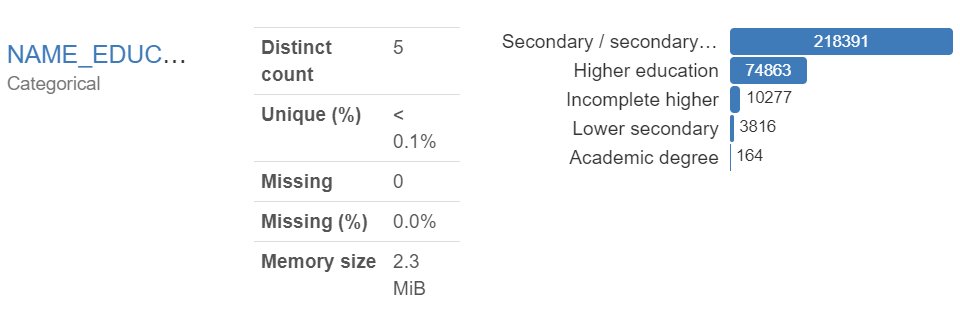

In [132]:
# 教育水準
Image("5.png")

- 中等教育までの人が多い
- この特徴量のみ、抽出したカテゴリカル変数の中では順序尺度と考える
- 変換にあたってはmappinngが必要と考える

In [73]:
# 教育水準の特徴量を順序尺度と考え、整数でラベリング
display(df_cat['NAME_EDUCATION_TYPE'].head())
education_map = {'Lower secondary': 1, 
                 'Secondary / secondary special': 2,
                 'Incomplete higher': 3,
                 'Higher education': 4,
                 'Academic degree':5}
df_cat1 = df_cat['NAME_EDUCATION_TYPE'].map(education_map)
df_cat1.head()

0    Secondary / secondary special
1                 Higher education
2    Secondary / secondary special
3    Secondary / secondary special
4    Secondary / secondary special
Name: NAME_EDUCATION_TYPE, dtype: object

0    2
1    4
2    2
3    2
4    2
Name: NAME_EDUCATION_TYPE, dtype: int64

- 順序尺度が整数値データに変換されている

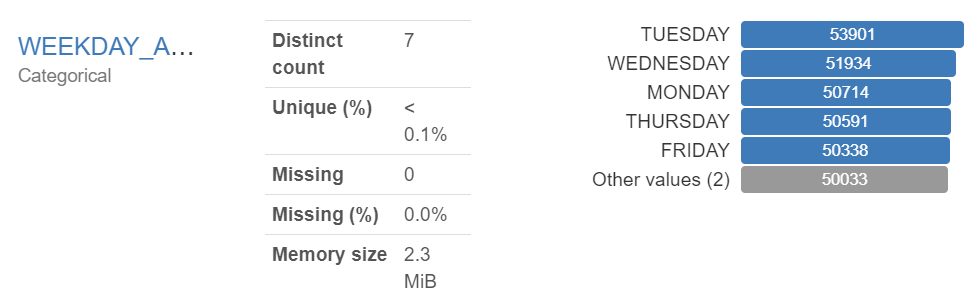

In [76]:
# その他のカテゴリカル変数
Image("7.png")

In [77]:
# このように序列のない多値分類はone hotに変換
# 多重共線性を減らすため最初のカテゴリを落とす
df_cat5 = pd.get_dummies(df_cat[['NAME_FAMILY_STATUS', 
                                 'NAME_HOUSING_TYPE',
                                 'NAME_INCOME_TYPE', 
                                 'NAME_TYPE_SUITE', 
                                 'WEEKDAY_APPR_PROCESS_START']], drop_first=True)
df_cat5.head()

,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,...,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


- その他のカテゴリカル変数がone hot型へ変換された

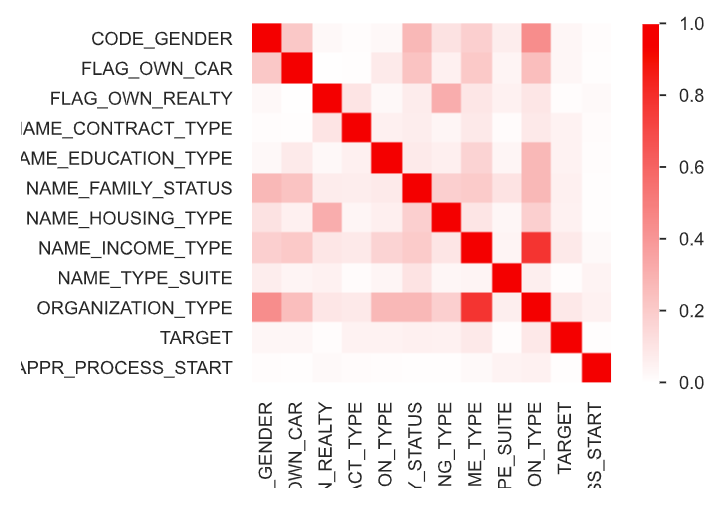

In [133]:
# φ係数
Image("6.png")

- 教育水準や車・不動産の有無などはTARGETと相関がありそうに思われたが、φ係数では強い連関をもつ特徴量は確認できない
- なおφ係数は、カテゴリ数が異なる特徴量間では比較できない

< categorical variables>


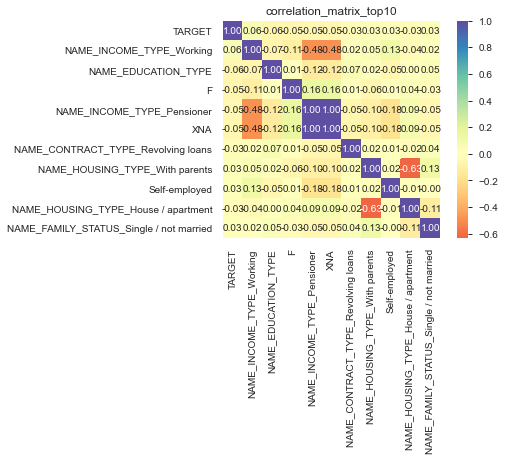

In [62]:
# 変換されたデータを使い、TARGETとの相関係数を測定
df_category = pd.concat([df_cat1, df_cat2, df_cat3, 
                         df_cat4, df_cat5, df['TARGET']], axis=1)
cor_matrix_cat = df_category.corr(method='pearson')
# 上位10を取り出しヒートマップ化
cor_abs = np.abs(cor_matrix_cat.loc[:,'TARGET'])
cor_top10 = cor_abs.sort_values(ascending=False)[:11]
cor_matrix_top10 = df_category.loc[:, cor_top10.index].corr(method='pearson')

sns.heatmap(cor_matrix_top10, cbar=True, annot=True,
           square=True, cmap='Spectral', center=0, fmt='.2f') 
print('< categorical variables>')
plt.title("correlation_matrix_top10")
plt.show()

- カテゴリカル変数を変換しても、相関係数の高いものは見つからない
- 特に順序尺度と思われる教育水準にも、φ係数と同様とくに相関がみられない
- XNA / NAME_INCOME_TYPE_Pensionerの相関が強いので、これらを用いる場合には多重共線性に留意が必要

### 2. numerical variable

In [71]:
# 数値データを取得
df_num = df.drop(df_cat.columns, axis=1)
df_num = pd.concat([df['TARGET'], df_num], axis=1)
df_num.head()

,TARGET,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


< numerical variables >


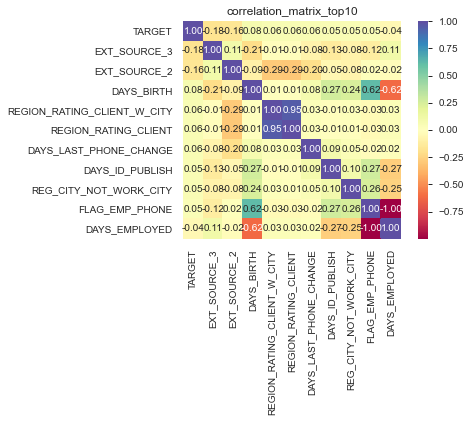

In [67]:
# 相関係数を計算し上位の10個を取り出す
cor_matrix = df_num.corr(method='pearson')
cor_abs = np.abs(cor_matrix.loc[:,'TARGET'])
cor_top10 = cor_abs.sort_values(ascending=False)[:11]

cor_matrix_top10 = df_num.loc[:, cor_top10.index].corr(method='pearson')
sns.heatmap(cor_matrix_top10, cbar=True, annot=True,
           square=True, cmap='Spectral', center=0, fmt='.2f')
print('< numerical variables >')
plt.title("correlation_matrix_top10")
plt.show()

- 数値変数で最も上位である「外部データベースのスコア」でも、相関係数は-0.18程度
- ただし、線形でない複雑な相関をとらえられていない可能性はある
- REGION_RATING_CLIENT / REGION_RATING_CLIENT_W_CITYとFLAG_EMP_PHONE / DAYS_EMPLOYEDの相関が強いため、これらを用いる場合には多重共線性に留意が必要

### 3. deficits

In [83]:
# 欠損率が0.8以上のものを抽出
df_def = train.drop(df, axis=1)
df_def = pd.concat([train['TARGET'], df_def], axis=1)
df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   TARGET                        307511 non-null  int64  
 1   OWN_CAR_AGE                   104582 non-null  float64
 2   OCCUPATION_TYPE               211120 non-null  object 
 3   EXT_SOURCE_1                  134133 non-null  float64
 4   APARTMENTS_AVG                151450 non-null  float64
 5   BASEMENTAREA_AVG              127568 non-null  float64
 6   YEARS_BEGINEXPLUATATION_AVG   157504 non-null  float64
 7   YEARS_BUILD_AVG               103023 non-null  float64
 8   COMMONAREA_AVG                92646 non-null   float64
 9   ELEVATORS_AVG                 143620 non-null  float64
 10  ENTRANCES_AVG                 152683 non-null  float64
 11  FLOORSMAX_AVG                 154491 non-null  float64
 12  FLOORSMIN_AVG                 98869 non-null

- 欠損率が多い特徴量は、主に顧客の住居に関する情報
- 数値変数がほとんどのようなので、欠損値は0に変換し相関係数をみる

,TARGET,OWN_CAR_AGE,OCCUPATION_TYPE,EXT_SOURCE_1,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,1,0.0,Laborers,0.083037,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No
1,0,0.0,Core staff,0.311267,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No
2,0,26.0,Laborers,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,...,0.0000,0.0000,0.0000,0.0000,0.00,0,0,0.0000,0,0
3,0,0.0,Laborers,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,...,0.0000,0.0000,0.0000,0.0000,0.00,0,0,0.0000,0,0
4,0,0.0,Core staff,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,...,0.0000,0.0000,0.0000,0.0000,0.00,0,0,0.0000,0,0


< deficit variables >


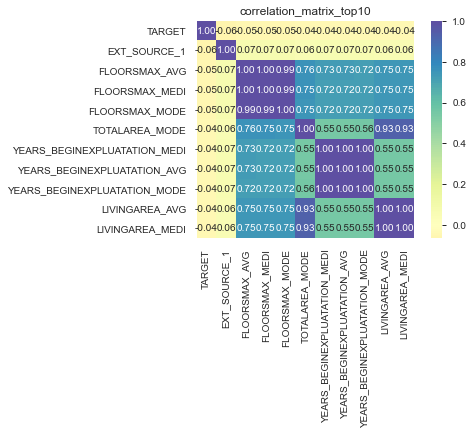

In [81]:
# 欠損値はすべて0に変換
df_def = df_def.fillna(0)
display(df_def.head())

# 相関係数を計算し上位の10個を取り出す
cor_matrix = df_def.corr(method='pearson')
cor_abs = np.abs(cor_matrix.loc[:,'TARGET'])
cor_top10 = cor_abs.sort_values(ascending=False)[:11]

cor_matrix_top10 = df_def.loc[:, cor_top10.index].corr(method='pearson')
sns.heatmap(cor_matrix_top10, cbar=True, annot=True,
           square=True, cmap='Spectral', center=0, fmt='.2f')
print('< deficit variables >')
plt.title("correlation_matrix_top10")
plt.show()

- 「住居に関する情報がない」＝「ホームレス」であったらTARGETに差が出そうなものだが、欠損値を0に変換して相関係数を計算してもほとんど相関は見られない
- このことから、値の欠損自体が予測に影響するわけではなさそう

### 4. etc

以降は自分なりに特徴量を抽出・変換してTARGETとの関係をみる  
  
1. スケールの等しい特徴量をまとめる
 - 正規化された'EXT_SOURCE'の1～3や二値分類（0/1）の'FALG' / 'REG'シリーズなど、同じスケールをもつ特徴量を足してみる  
 - 「携帯電話につながったかどうか」や「申告していた住所と実際の住所が違ったか」などを統合するので、信用にとり＋の情報は加点、－の情報は減点する 
   
 
2. 職業別でのdefault率を比較する
 - 欠損値が多く除外されていたカテゴリカル変数で、返済能にも関係がありそう

In [129]:
# 'EXT_SOURCE'の1～3を足して新たなスコアにする
df_temp = train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
display(df_temp.head())
df_ext = df_temp.sum(axis=1)
display(df_ext.head())

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.083037,0.262949,0.139376
1,0.311267,0.622246,NaN
2,NaN,0.555912,0.729567
3,NaN,0.650442,NaN
4,NaN,0.322738,NaN


0    0.485361
1    0.933513
2    1.285479
3    0.650442
4    0.322738
dtype: float64

In [112]:
# 信用に＋の数値特徴を足し、－の特徴を引く
# 電話・メール関係（1:加点、0：減点）
df_temp = train.iloc[:, 22:28]
display(df_temp.head())
df_pos = df_temp.sum(axis=1)
display(df_pos.head())

# 住所関係（1:減点、0:加点）
df_temp = train.iloc[:, 34:40]
display(df_temp.head())
df_neg = df_temp.sum(axis=1)
display(df_neg.head())

df_credit = df_pos - df_neg
display(df_credit.head())

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL
0,1,1,0,1,1,0
1,1,1,0,1,1,0
2,1,1,1,1,1,0
3,1,1,0,1,0,0
4,1,1,0,1,0,0


0    4
1    4
2    5
3    3
4    3
dtype: int64

,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,1,1


0    0
1    0
2    0
3    0
4    2
dtype: int64

0    4
1    4
2    5
3    3
4    1
dtype: int64

In [101]:
# 欠損値の多い住居関係の特徴量群もスケールが同じであるため統合
df_temp = train.iloc[:, 44:90]
display(df_temp.head())
df_house = df_temp.sum(axis=1)
display(df_house.head())

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE
0,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,...,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick"
1,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,...,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0    6.1040
1    8.7279
2    0.0000
3    0.0000
4    0.0000
dtype: float64

In [110]:
# default関係の情報も統合
df_temp = train.iloc[:, 91:95]
display(df_temp.head())
df_default = df_temp.sum(axis=1)
display(df_default.head())

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,2.0,2.0,2.0,2.0
1,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0
3,2.0,0.0,2.0,0.0
4,0.0,0.0,0.0,0.0


0    8.0
1    2.0
2    0.0
3    4.0
4    0.0
dtype: float64

In [114]:
# document関係の情報も統合
df_temp = train.iloc[:, 96:116]
display(df_temp.head())
df_document = df_temp.sum(axis=1)
display(df_document.head())

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


0    1
1    1
2    0
3    1
4    1
dtype: int64

In [149]:
# Inquire(信用調査機関への問い合わせ回数)も統合
df_temp = train.iloc[:, 117:123]
display(df_temp.head())
df_inquire = df_temp.sum(axis=1)
display(df_inquire.head())

,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0


0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

< original variables >


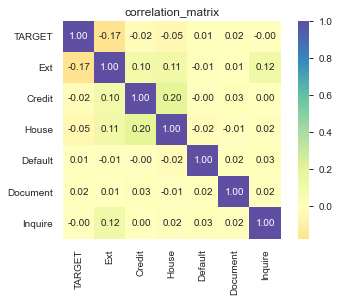

In [150]:
# これら7つの特徴量で散布図行列、相関係数行列をみる
df_original = pd.DataFrame({'TARGET': train['TARGET'],
                            'Ext' : df_ext,
                            'Credit' : df_credit,
                            'House' : df_house,
                            'Default' : df_default,
                            'Document' : df_document,
                            'Inquire' : df_inquire})
df_original.head()

# 相関係数マップ
cor_matrix = df_original.corr(method='pearson')
sns.heatmap(cor_matrix, cbar=True, annot=True,
           square=True, cmap='Spectral', center=0, fmt='.2f')
print('< original variables >')
plt.title("correlation_matrix")
plt.show()

- 特徴量をまとめてみたが、新たにTARGETと強い相関を示すものは見つからなかった
- 'EXT_SOUCE'をみると、1～3を足し合わせた変数はこれらの平均的な相関を示すのではないかと思われた

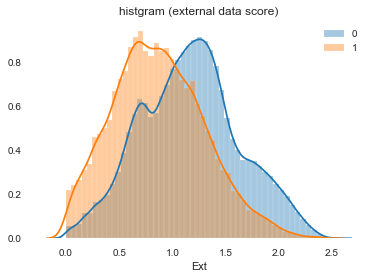

In [152]:
# ヒストグラム(Ext)
x1 = df_original[df_original['TARGET']==0]['Ext']
x2 = df_original[df_original['TARGET']==1]['Ext']
sns.distplot(x1, label=0)
sns.distplot(x2, label=1)
plt.legend()
plt.title('histgram (external data score)')
plt.show()

- 正規化されているため、TARGETによらずscoreは正規分布に近いものに見える
- この他に、分布に特徴的な個所は見いだせない
- 相関係数の最も強い特徴量であるが、これ単独でTARGETの予測は難しそう

In [186]:
df_job = pd.get_dummies(train['OCCUPATION_TYPE'])
display(df_job.head())
df_temp = pd.concat([train['TARGET'], df_job], axis=1)
df_default = df_temp[df_temp['TARGET']==1]
df_default = df_default.drop(['TARGET'], axis=1)

print("\n< total >")
display(df_job.sum())
print("\n< default >")
display(df_default.sum())
print("\n< rate(default/total) >")
display(df_job.sum() / df_default.sum())

,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0



< total >


Accountants               9813
Cleaning staff            4653
Cooking staff             5946
Core staff               27570
Drivers                  18603
HR staff                   563
High skill tech staff    11380
IT staff                   526
Laborers                 55186
Low-skill Laborers        2093
Managers                 21371
Medicine staff            8537
Private service staff     2652
Realty agents              751
Sales staff              32102
Secretaries               1305
Security staff            6721
Waiters/barmen staff      1348
dtype: int64


< default >


Accountants               474
Cleaning staff            447
Cooking staff             621
Core staff               1738
Drivers                  2107
HR staff                   36
High skill tech staff     701
IT staff                   34
Laborers                 5838
Low-skill Laborers        359
Managers                 1328
Medicine staff            572
Private service staff     175
Realty agents              59
Sales staff              3092
Secretaries                92
Security staff            722
Waiters/barmen staff      152
dtype: int64


< rate(default/total) >


Accountants              20.702532
Cleaning staff           10.409396
Cooking staff             9.574879
Core staff               15.863061
Drivers                   8.829141
HR staff                 15.638889
High skill tech staff    16.233951
IT staff                 15.470588
Laborers                  9.452895
Low-skill Laborers        5.830084
Managers                 16.092620
Medicine staff           14.924825
Private service staff    15.154286
Realty agents            12.728814
Sales staff              10.382277
Secretaries              14.184783
Security staff            9.308864
Waiters/barmen staff      8.868421
dtype: float64

- 職業間でdefault率に違いがみられた
- 会計士や高度専門技術者などでむしろ高く、技術の低い労働者やドライバー、ウェイターなどの職業ではむしろ低い結果となった
- 理由としては、収入が高いと思われる専門職では借入額が高額となる傾向があり、予期せぬ事態で返済が困難になりやすいことが想像された

### ＜考察のまとめ＞  
TARGETの推測に有用な特徴量を探索してみたが、今回の探索では特に有用と思われる特徴量を見出すことはできなかった。相関係数はあくまで線形関係での相関の強さを表すものであるため、例えば二次関数のような関係性があっても値は小さく出てしまう。  
今後は相関係数のみで判断することなく、背後の仮説を想像しながら特徴量の探索を試みていきたいと思った。